In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline

# Goal
- Classify each video into one the 3 categories below and e􏰇􏰈xplain you approach:
"Hot" - means trending up. These videos are candidate to be shown.
"Stable and Popular" - video view counts are flat, but very high. These videos are candidates to be shown too.
"Everything else" - these videos won't be shown.
- What are the main characteristics of the "hot videos"?
- After having identified the characteristics of the hot videos, how would you use this information from a product standpoint?

In [2]:
# return unique value in each dataframe and columns 
def return_unique(dataframe, col):
    print(col, 'has', len(dataframe[col].unique()), 'value')

In [3]:
count = pd.read_csv('video_count.csv',parse_dates=['date'])
count.head()

,video_id,count,date
0,2303,22,2015-01-07
1,1193,54854,2015-01-12
2,1219,1788779,2015-01-03
3,1472,234,2015-01-04
4,2947,14407,2015-01-08


In [4]:
return_unique(count,'video_id')
return_unique(count,'date')

video_id has 2785 value
date has 15 value


In [5]:
feature = pd.read_csv('video_features.csv',parse_dates=['video_upload_date'])
feature.head()

,video_id,video_length,video_language,video_upload_date,video_quality
0,2374,1760,Cn,2014-12-06,480p
1,1897,489,Cn,2014-12-10,720p
2,2386,1273,Es,2014-12-05,480p
3,2912,986,Es,2014-12-10,240p
4,2432,1050,Other,2014-12-10,480p


In [6]:
return_unique(feature,'video_id')
return_unique(feature,'video_language')
return_unique(feature,'video_quality')
return_unique(feature,'video_upload_date')

video_id has 2785 value
video_language has 6 value
video_quality has 5 value
video_upload_date has 23 value


In [7]:
count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41775 entries, 0 to 41774
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   video_id  41775 non-null  int64         
 1   count     41775 non-null  int64         
 2   date      41775 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 979.2 KB


In [8]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785 entries, 0 to 2784
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           2785 non-null   int64         
 1   video_length       2785 non-null   int64         
 2   video_language     2785 non-null   object        
 3   video_upload_date  2785 non-null   datetime64[ns]
 4   video_quality      2785 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 108.9+ KB


In [9]:
df = pd.merge(feature,count,how = 'right')
df.rename(columns = {'date':'watch_date'},inplace = True)
df.head()

,video_id,video_length,video_language,video_upload_date,video_quality,count,watch_date
0,2374,1760,Cn,2014-12-06,480p,233510,2015-01-05
1,2374,1760,Cn,2014-12-06,480p,115542,2015-01-11
2,2374,1760,Cn,2014-12-06,480p,64475,2015-01-15
3,2374,1760,Cn,2014-12-06,480p,128935,2015-01-09
4,2374,1760,Cn,2014-12-06,480p,84993,2015-01-14


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41775 entries, 0 to 41774
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           41775 non-null  int64         
 1   video_length       41775 non-null  int64         
 2   video_language     41775 non-null  object        
 3   video_upload_date  41775 non-null  datetime64[ns]
 4   video_quality      41775 non-null  object        
 5   count              41775 non-null  int64         
 6   watch_date         41775 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 2.5+ MB


In [11]:
# convert seconds to hour 
df['video_length_in_hour'] = df.video_length/3600

# EDA

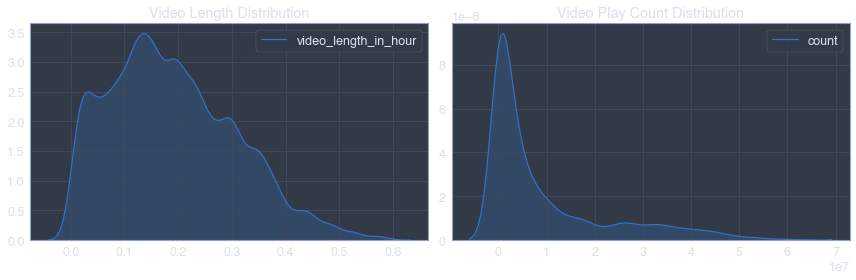

In [12]:
fig,ax= plt.subplots(ncols=2,figsize = (12,4))
sns.kdeplot(df.video_length_in_hour, shade=True, ax=ax[0])
ax[0].set_title('Video Length Distribution')

sns.kdeplot(df.groupby('video_id')['count'].sum(), shade=True, ax=ax[1])
ax[1].set_title('Video Play Count Distribution')
plt.tight_layout()
plt.show()

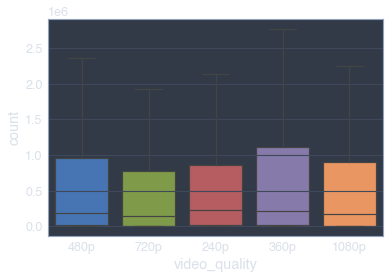

In [13]:
sns.boxplot(data = df,x='video_quality',y='count',showfliers = False)

In [30]:
df.groupby(['video_id', 'watch_date'])[['count']].sum()

count
video_id watch_date        
1        2015-01-01  140460
         2015-01-02  129082
         2015-01-03  120868
         2015-01-04   97849
         2015-01-05   94821
...                     ...
3000     2015-01-11  131871
         2015-01-12  131962
         2015-01-13  126304
         2015-01-14   89758
         2015-01-15   71889

[41775 rows x 1 columns]

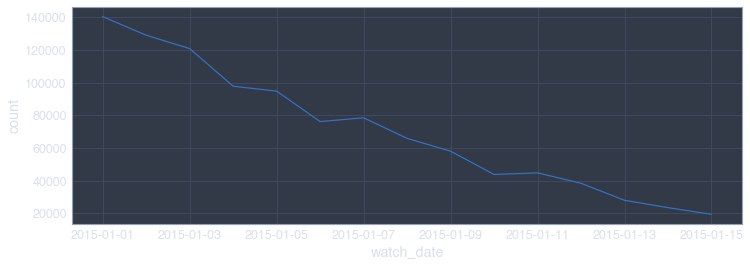

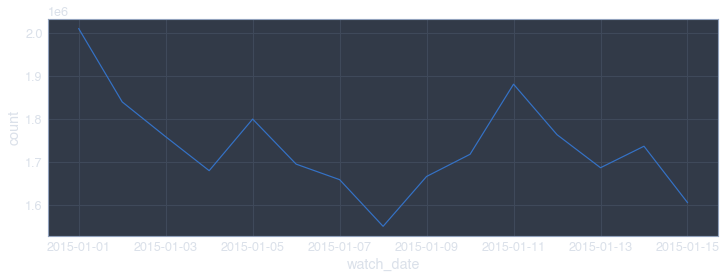

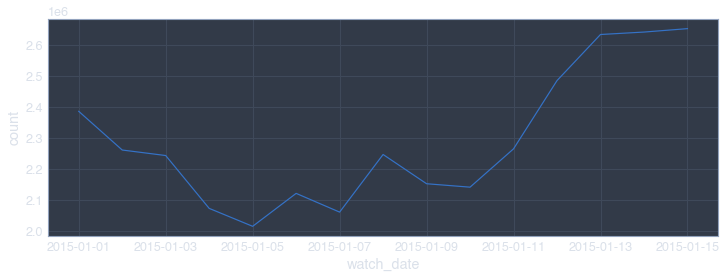

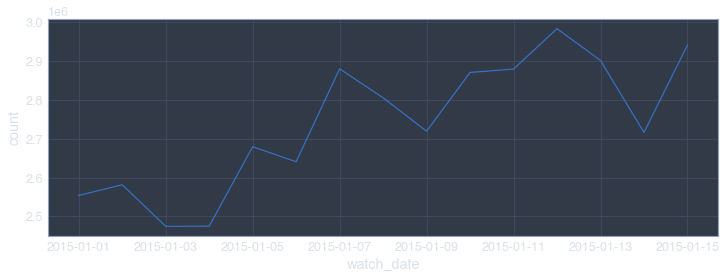

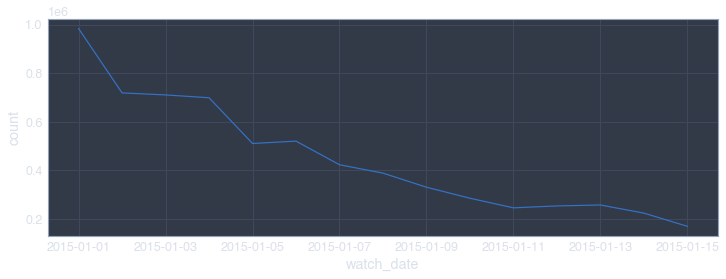

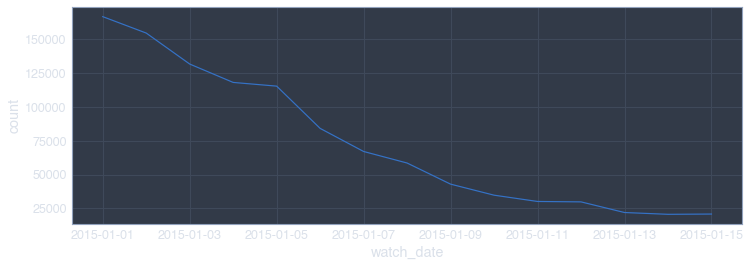

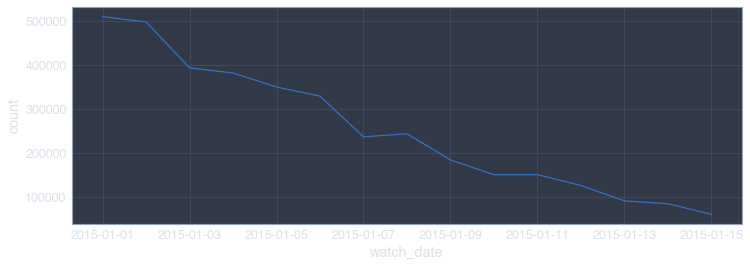

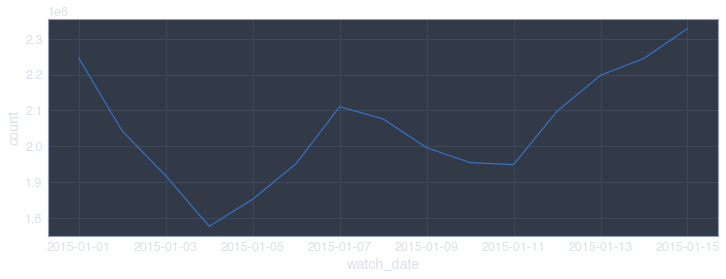

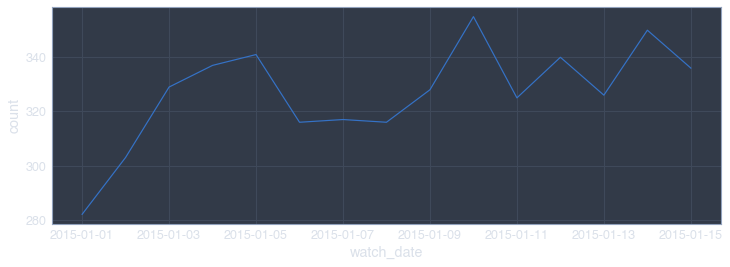

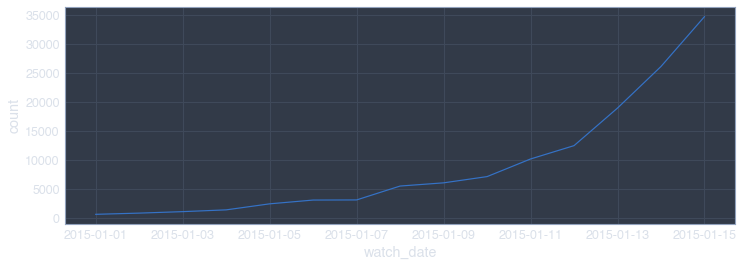

In [46]:
for i in range(1,11):
    plt.figure(figsize = (12,4))
    video_id1 = df[df['video_id']==i]
    sns.lineplot(x = video_id1['watch_date'],y=video_id1['count'])

In [47]:
df[df['watch_date']=='2015-01-01']

,video_id,video_length,video_language,video_upload_date,video_quality,count,watch_date,video_length_in_hour
8,2374,1760,Cn,2014-12-06,480p,357963,2015-01-01,0.488889
22,1897,489,Cn,2014-12-10,720p,2133032,2015-01-01,0.135833
42,2386,1273,Es,2014-12-05,480p,1838799,2015-01-01,0.353611
52,2912,986,Es,2014-12-10,240p,831198,2015-01-01,0.273889
68,2432,1050,Other,2014-12-10,480p,329759,2015-01-01,0.291667
...,...,...,...,...,...,...,...,...
41708,3,807,En,2014-12-15,1080p,2386683,2015-01-01,0.224167
41716,588,370,Es,2014-12-09,720p,198,2015-01-01,0.102778
41742,1209,1491,Other,2014-12-08,480p,1185812,2015-01-01,0.414167
41749,1940,155,En,2014-12-18,720p,7347,2015-01-01,0.043056


In [104]:
first_watch_date = df[df['watch_date'] == '2015-01-01'][['video_id', 'count']]
last_watch_date = df[df['watch_date'] == '2015-01-15'][['video_id', 'count']]
df1 = pd.merge(first_watch_date, last_watch_date, on='video_id')
df1.rename(columns={
    'count_x': 'first_day_count',
    'count_y': 'last_day_count'
},
           inplace=True)
df1

,video_id,first_day_count,last_day_count
0,2374,357963,64475
1,1897,2133032,1339374
2,2386,1838799,230311
3,2912,831198,76578
4,2432,329759,83427
...,...,...,...
2780,3,2386683,2653063
2781,588,198,112
2782,1209,1185812,305453
2783,1940,7347,1884276


In [105]:
df1['increase_watching_count'] = df1['last_day_count']-df1['first_day_count']

In [106]:
df1.sort_values(by = 'video_id')

,video_id,first_day_count,last_day_count,increase_watching_count
575,1,140460,19382,-121078
2604,2,2011096,1605905,-405191
2780,3,2386683,2653063,266380
102,4,2553866,2941741,387875
1997,5,983058,169730,-813328
...,...,...,...,...
428,2996,273800,43105,-230695
1876,2997,1491540,2076871,585331
1278,2998,33,20,-13
1988,2999,4437,730,-3707


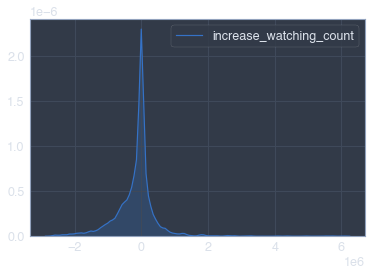

In [108]:
sns.kdeplot(df1['increase_watching_count'], shade=True)

In [109]:
df1['increase_watching_count'].describe()

count    2.785000e+03
mean    -1.546527e+05
std      6.284170e+05
min     -2.682614e+06
25%     -3.663540e+05
50%     -1.319300e+04
75%      3.544200e+04
max      6.055390e+06
Name: increase_watching_count, dtype: float64

In [112]:
bins = [-float("inf"),-3.663540e+05,3.544200e+04,float("inf")]

In [113]:
df1['label'] = pd.cut(df1['increase_watching_count'],
                     bins=bins,
                     labels=['everything else', 'Stable and Popular', 'Hot'])
df1.sort_values('video_id')

,video_id,first_day_count,last_day_count,increase_watching_count,label
575,1,140460,19382,-121078,Stable and Popular
2604,2,2011096,1605905,-405191,everything else
2780,3,2386683,2653063,266380,Hot
102,4,2553866,2941741,387875,Hot
1997,5,983058,169730,-813328,everything else
...,...,...,...,...,...
428,2996,273800,43105,-230695,Stable and Popular
1876,2997,1491540,2076871,585331,Hot
1278,2998,33,20,-13,Stable and Popular
1988,2999,4437,730,-3707,Stable and Popular


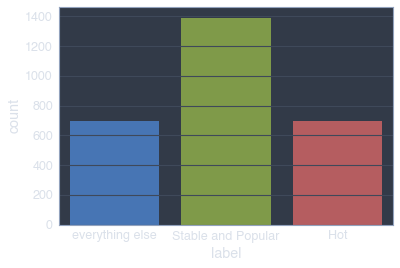

In [114]:
sns.countplot(df1['label'])

In [123]:
df2 = pd.merge(feature,df1[['video_id','label']])
df2

,video_id,video_length,video_language,video_upload_date,video_quality,label
0,2374,1760,Cn,2014-12-06,480p,Stable and Popular
1,1897,489,Cn,2014-12-10,720p,everything else
2,2386,1273,Es,2014-12-05,480p,everything else
3,2912,986,Es,2014-12-10,240p,everything else
4,2432,1050,Other,2014-12-10,480p,Stable and Popular
...,...,...,...,...,...,...
2780,3,807,En,2014-12-15,1080p,Hot
2781,588,370,Es,2014-12-09,720p,Stable and Popular
2782,1209,1491,Other,2014-12-08,480p,everything else
2783,1940,155,En,2014-12-18,720p,Hot


In [124]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785 entries, 0 to 2784
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           2785 non-null   int64         
 1   video_length       2785 non-null   int64         
 2   video_language     2785 non-null   object        
 3   video_upload_date  2785 non-null   datetime64[ns]
 4   video_quality      2785 non-null   object        
 5   label              2785 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(2), object(2)
memory usage: 133.4+ KB


In [125]:
hot = df2[df2['label']=='Hot']
hot.head(3)

,video_id,video_length,video_language,video_upload_date,video_quality,label
19,611,189,Other,2014-12-18,720p,Hot
20,982,726,Es,2014-12-18,720p,Hot
23,2154,406,Cn,2014-12-12,720p,Hot


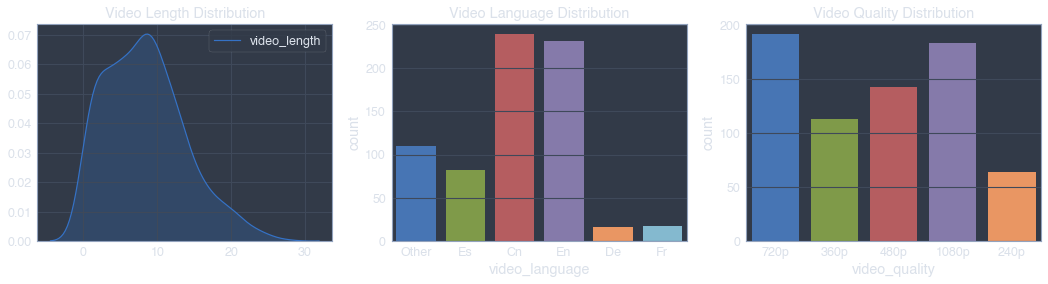

In [145]:
fig, ax = plt.subplots(ncols=3, figsize=(18, 4))

sns.kdeplot(hot['video_length']/60,shade = True,ax = ax[0])
ax[0].set_title('Video Length Distribution')

sns.countplot(hot['video_language'], ax=ax[1])
ax[1].set_title('Video Language Distribution')

sns.countplot(hot['video_quality'], ax=ax[2])
ax[2].set_title('Video Quality Distribution')
plt.show()

Hot Video Pattern:
- Within 20mins 
- Using CN or En
- 720P 0r 1080P